In [1]:
import supervisely_lib as sly
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from UnetV2Applier import UnetV2Applier
from os.path import join

%matplotlib inline

In [2]:
m = UnetV2Applier()

{"message": "Will init all required to inference.", "timestamp": "2018-09-08T16:55:53.336Z", "level": "info"}
{"message": "Input config", "config": {"res_names": {"project": "test"}, "preset": "Images"}, "timestamp": "2018-09-08T16:55:53.338Z", "level": "info"}
{"message": "Full config", "config": {"gpu_devices": [0], "model_classes": {"save_classes": "__all__", "add_suffix": "_unet"}, "existing_objects": {"save_classes": ["crack_net"], "add_suffix": ""}, "mode": {"source": "full_image"}, "res_names": {"project": "test"}, "preset": "Images"}, "timestamp": "2018-09-08T16:55:53.339Z", "level": "info"}
{"message": "Model input size is read (for auto-rescale).", "input_size": {"width": 512, "height": 256}, "timestamp": "2018-09-08T16:55:53.339Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"bg": 0, "neutral": 255, "crack_net": 1}, "timestamp": "2018-09-08T16:55:53.340Z", "level": "info"}
{"message": "Read model out classes", "classes": [{"title": "bg

In [3]:
model = sly.utils.InfFeederSlWindow(m.default_settings_for_modes, m.helper.in_project_meta, m.train_classes)

In [4]:
project_meta = m.helper.in_project_meta  # Project meta contains list of project classes.
project_dir = m.helper.paths.project_dir
project_fs = sly.ProjectFS.from_disk_dir_project(project_dir)

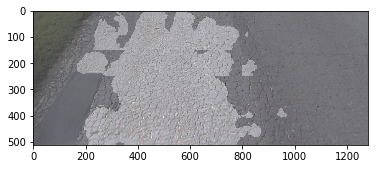

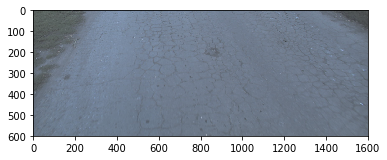

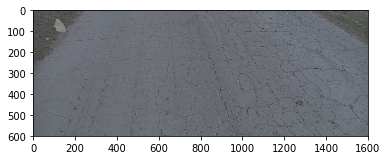

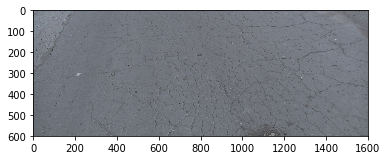

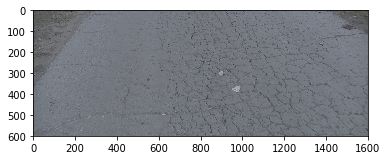

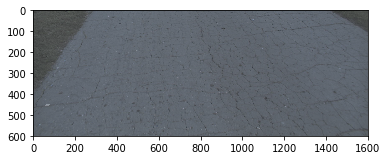

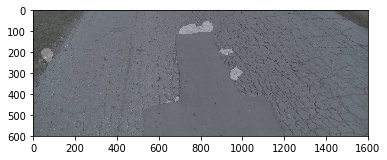

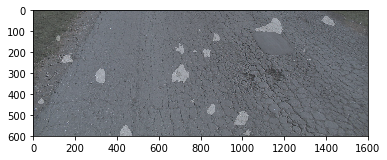

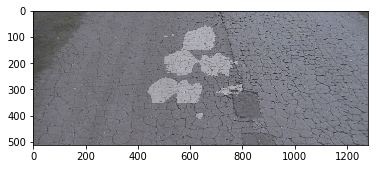

KeyboardInterrupt: 

In [5]:
for item_descr in project_fs:
    img = cv2.imread(item_descr.img_path)[:, :, ::-1]
    ann_packed = sly.json_load(item_descr.ann_path)
    blank_mask_inf = np.zeros((img.shape[0], img.shape[1], 3)).astype('uint8')
    ann = sly.Annotation.from_packed(ann_packed, m.helper.in_project_meta)
    new_ann = model.feed(img, ann, m._infer_on_img)
    color=100
    for obj in new_ann["objects"]:
        obj.draw(blank_mask_inf, color)
        color += 100
    res = cv2.addWeighted(img, .6, blank_mask_inf, .5, 0)
    plt.imshow(res)
    plt.show()